<h1 style="text-align: center;">Loan Approval 💰</h1>

# Importing lib

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("./Data/loan/loan_data_set.csv")
tempdf = df
df.head(6)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [5]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# visualizing data using graphs

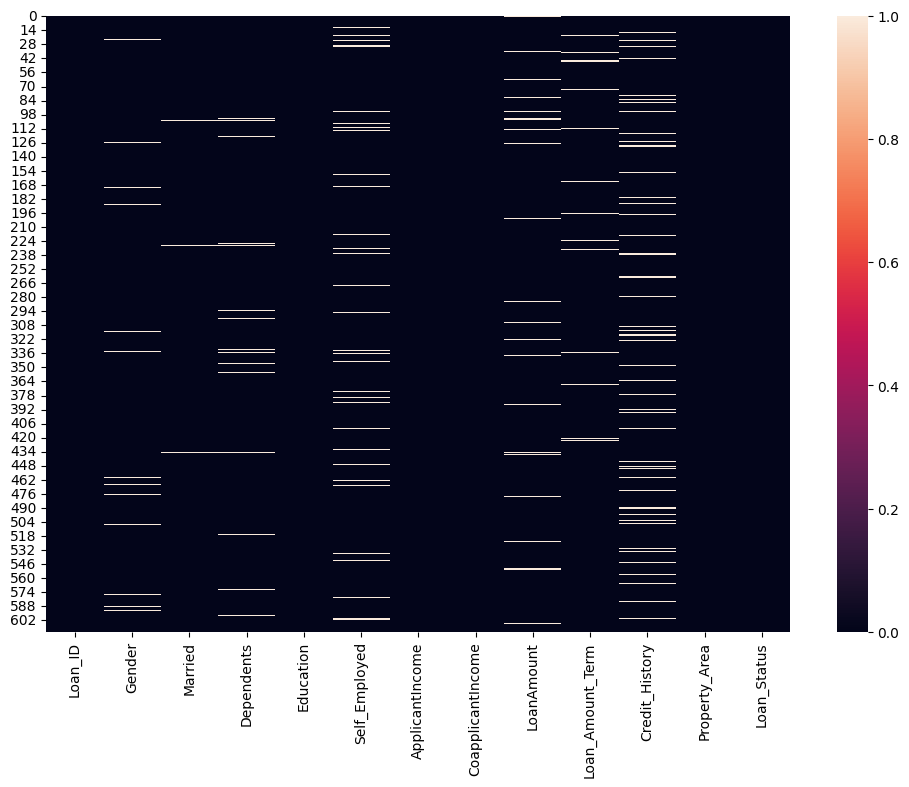

In [7]:
# visualizing null valuess
plt.figure(figsize=(12, 8))
sns.heatmap(data = df.isna())
plt.show()

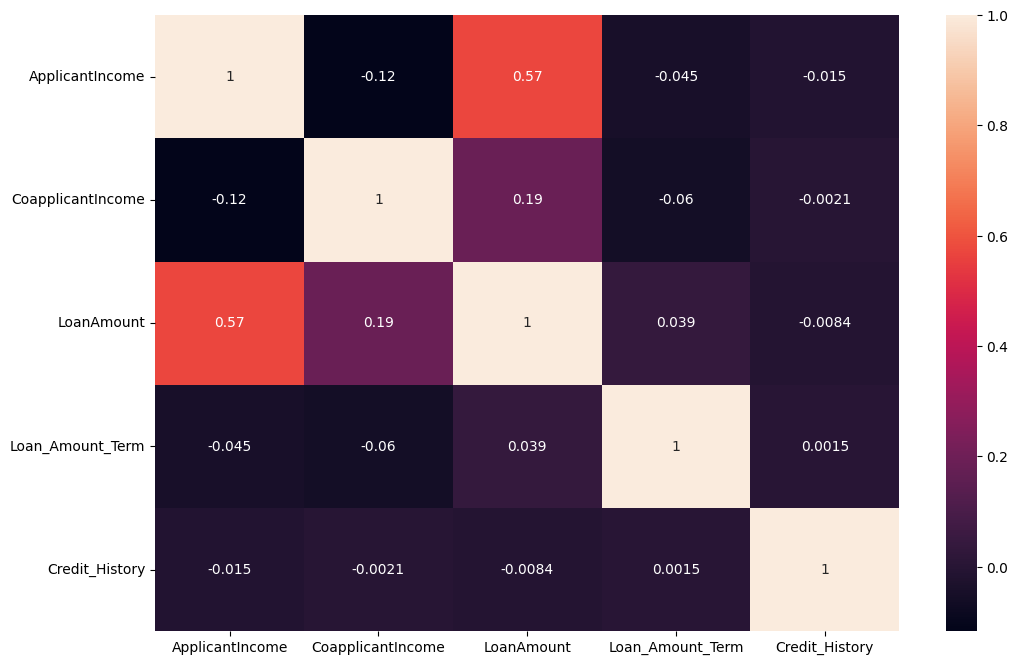

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

# this is howing beacause we dont have all numeric col

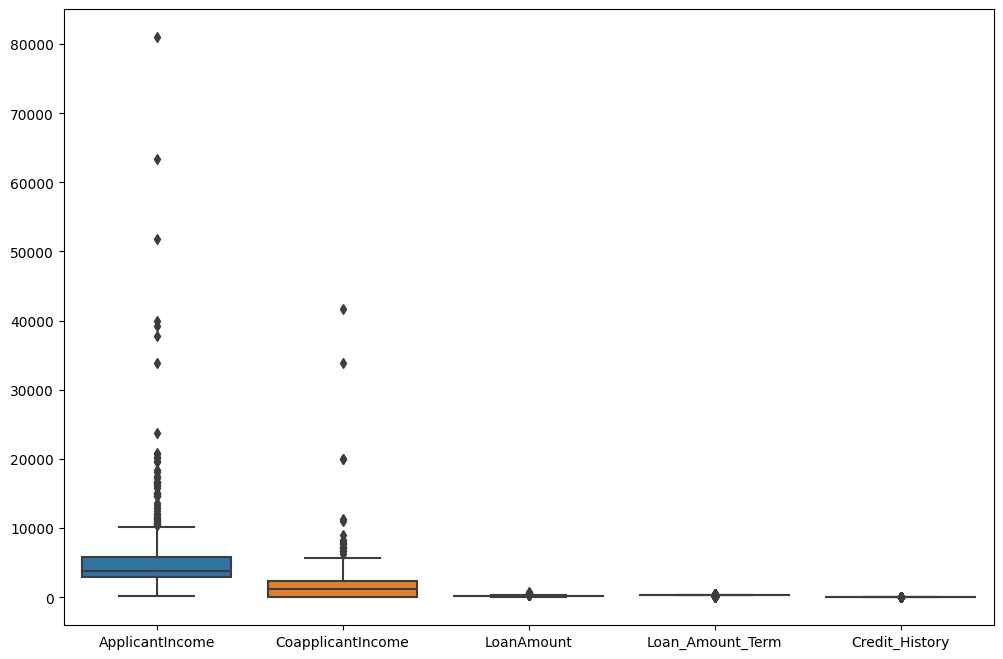

In [9]:
# Cheking Outliers 
plt.figure(figsize=(12, 8))
sns.boxplot(data = df)
plt.show()

# Step for cleaning data
1. removing duplicate and unncesorry data
2. removing outliers
3. handle missing data
4. col like object encoding
5. standardlisation (optional)

## 1. removing duplicate row and columns like "loan_ID"

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(614, 13)

In [12]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [14]:
df.drop(columns = ["Loan_ID"], inplace=True)

In [15]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## 2.removing outliers

In [16]:
df = df.loc[(df.ApplicantIncome <=7500) & (df.CoapplicantIncome <= 5600)]

In [17]:
df.shape

(501, 12)

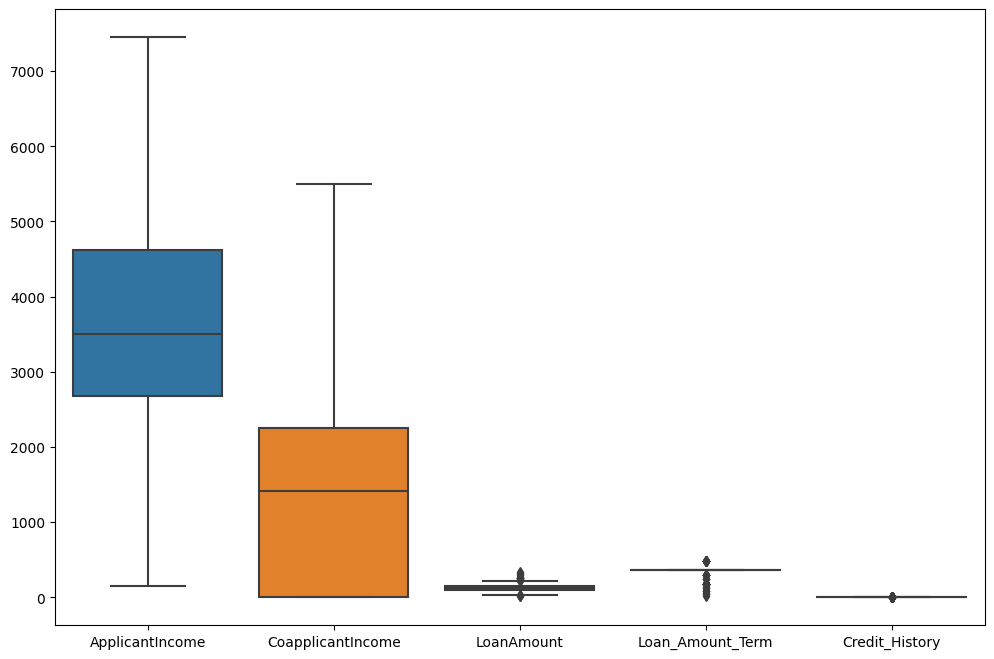

In [18]:
# Cheking Outliers 
plt.figure(figsize=(12, 8))
sns.boxplot(data = df)
plt.show()

## 3.handling missing data

In [19]:
df.isna().sum()

Gender                8
Married               2
Dependents           13
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           19
Loan_Amount_Term     13
Credit_History       44
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
def FillMissingData(df):
    """ that function takes arg as dataset and fill na values"""
    for i in df.columns:
        if (df[i].dtypes == "object"):
            df[i].fillna(value = df[i].mode()[0], inplace=True)
        elif (df[i].dtypes == "int64" or df[i].dtypes == "float64"):
            df[i].fillna(value =  df[i].median(), inplace=True)

In [21]:
FillMissingData(df)

In [22]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# visualisation

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             501 non-null    object 
 1   Married            501 non-null    object 
 2   Dependents         501 non-null    object 
 3   Education          501 non-null    object 
 4   Self_Employed      501 non-null    object 
 5   ApplicantIncome    501 non-null    int64  
 6   CoapplicantIncome  501 non-null    float64
 7   LoanAmount         501 non-null    float64
 8   Loan_Amount_Term   501 non-null    float64
 9   Credit_History     501 non-null    float64
 10  Property_Area      501 non-null    object 
 11  Loan_Status        501 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 50.9+ KB


In [24]:
cat = df.select_dtypes(include=["object"])
cat.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [25]:
num = df.select_dtypes(include=["int64", "float64"])
num.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [26]:
# countplot for dataset
# for i in cat.columns:
#     plt.figure(figsize=(4, 4))
#     ax = sns.countplot(x = i , data = cat)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


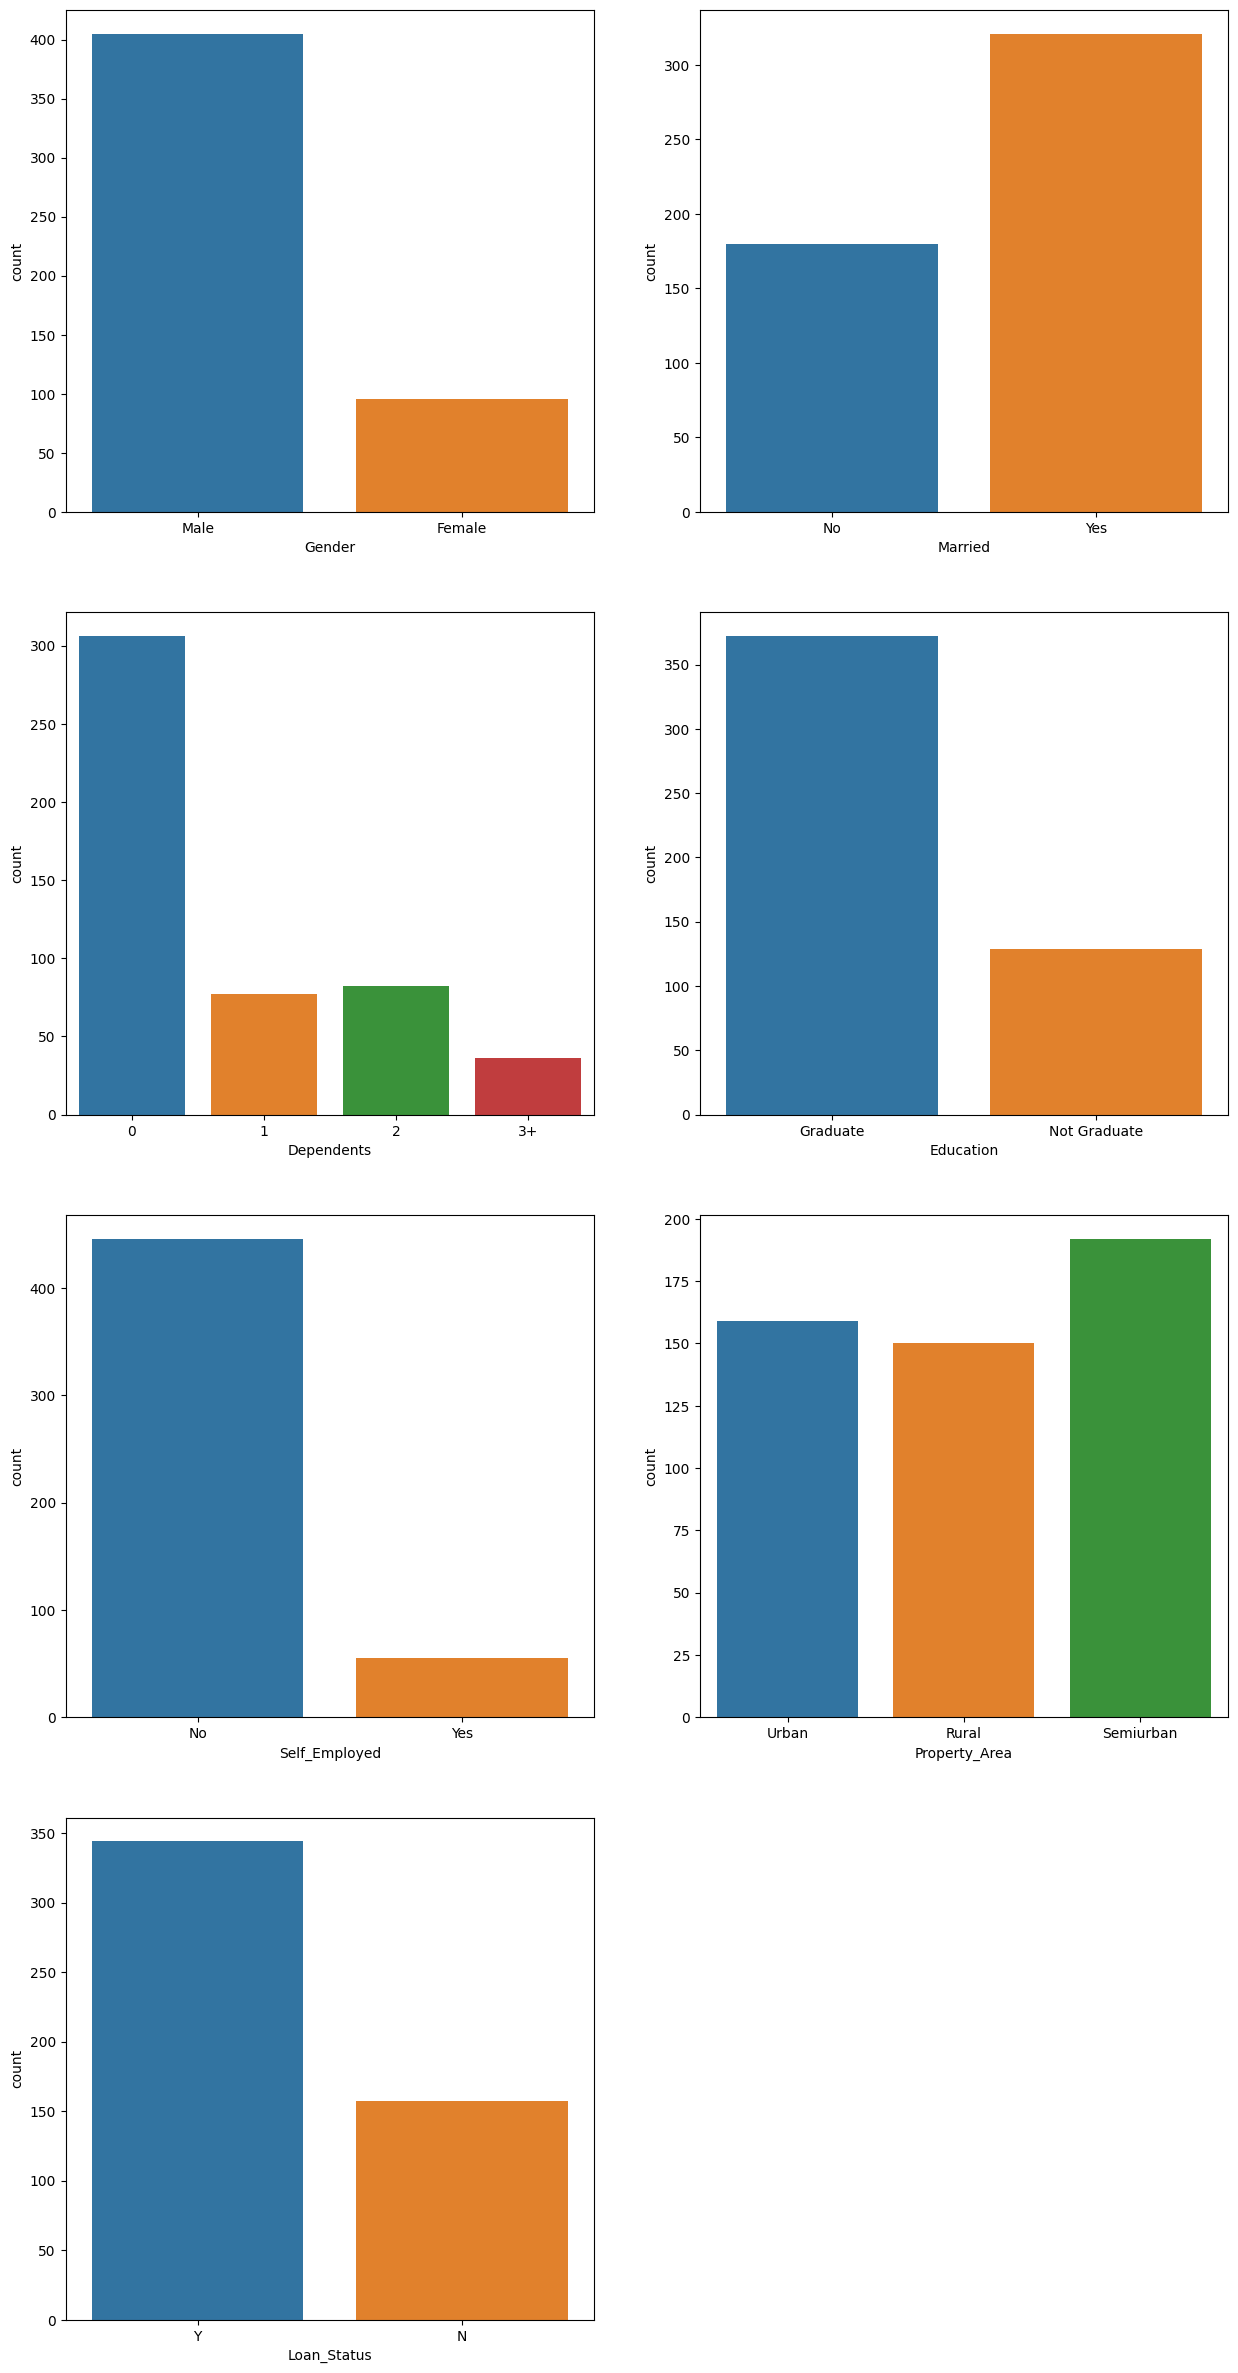

In [27]:
# plt.subplot(#total number of row, #total number of col, # plot number)
plt.figure(figsize=(15, 30))
for i, col in list(enumerate(cat)):
    plt.subplot(4, 2, i+1)
    sns.countplot(x = col, data= cat)
    

([<matplotlib.patches.Wedge at 0x1a1c83c97e0>,
 [Text(-0.608615753669513, 0.9162897273162517, 'yes'),
  Text(0.6086157536695124, -0.916289727316252, 'no')],
 [Text(-0.3319722292742798, 0.4997943967179554, '69%'),
  Text(0.33197222927427944, -0.4997943967179556, '31%')])

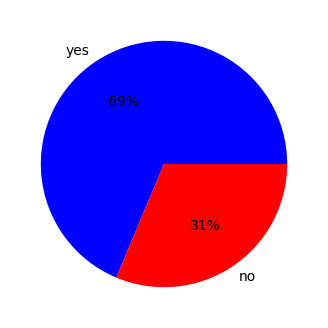

In [28]:
plt.figure(figsize=(4, 4))
plt.pie(df.Loan_Status.value_counts(), labels=["yes", "no"], colors="bright", autopct='%.0f%%')

<AxesSubplot: xlabel='ApplicantIncome', ylabel='LoanAmount'>

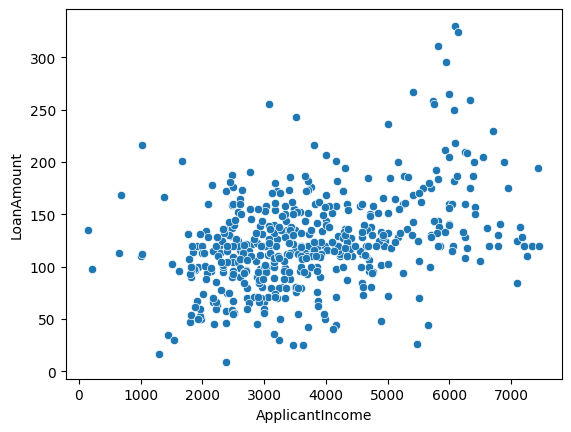

In [29]:
# for scatter plot
sns.scatterplot(data = df, x = "ApplicantIncome", y = "LoanAmount")

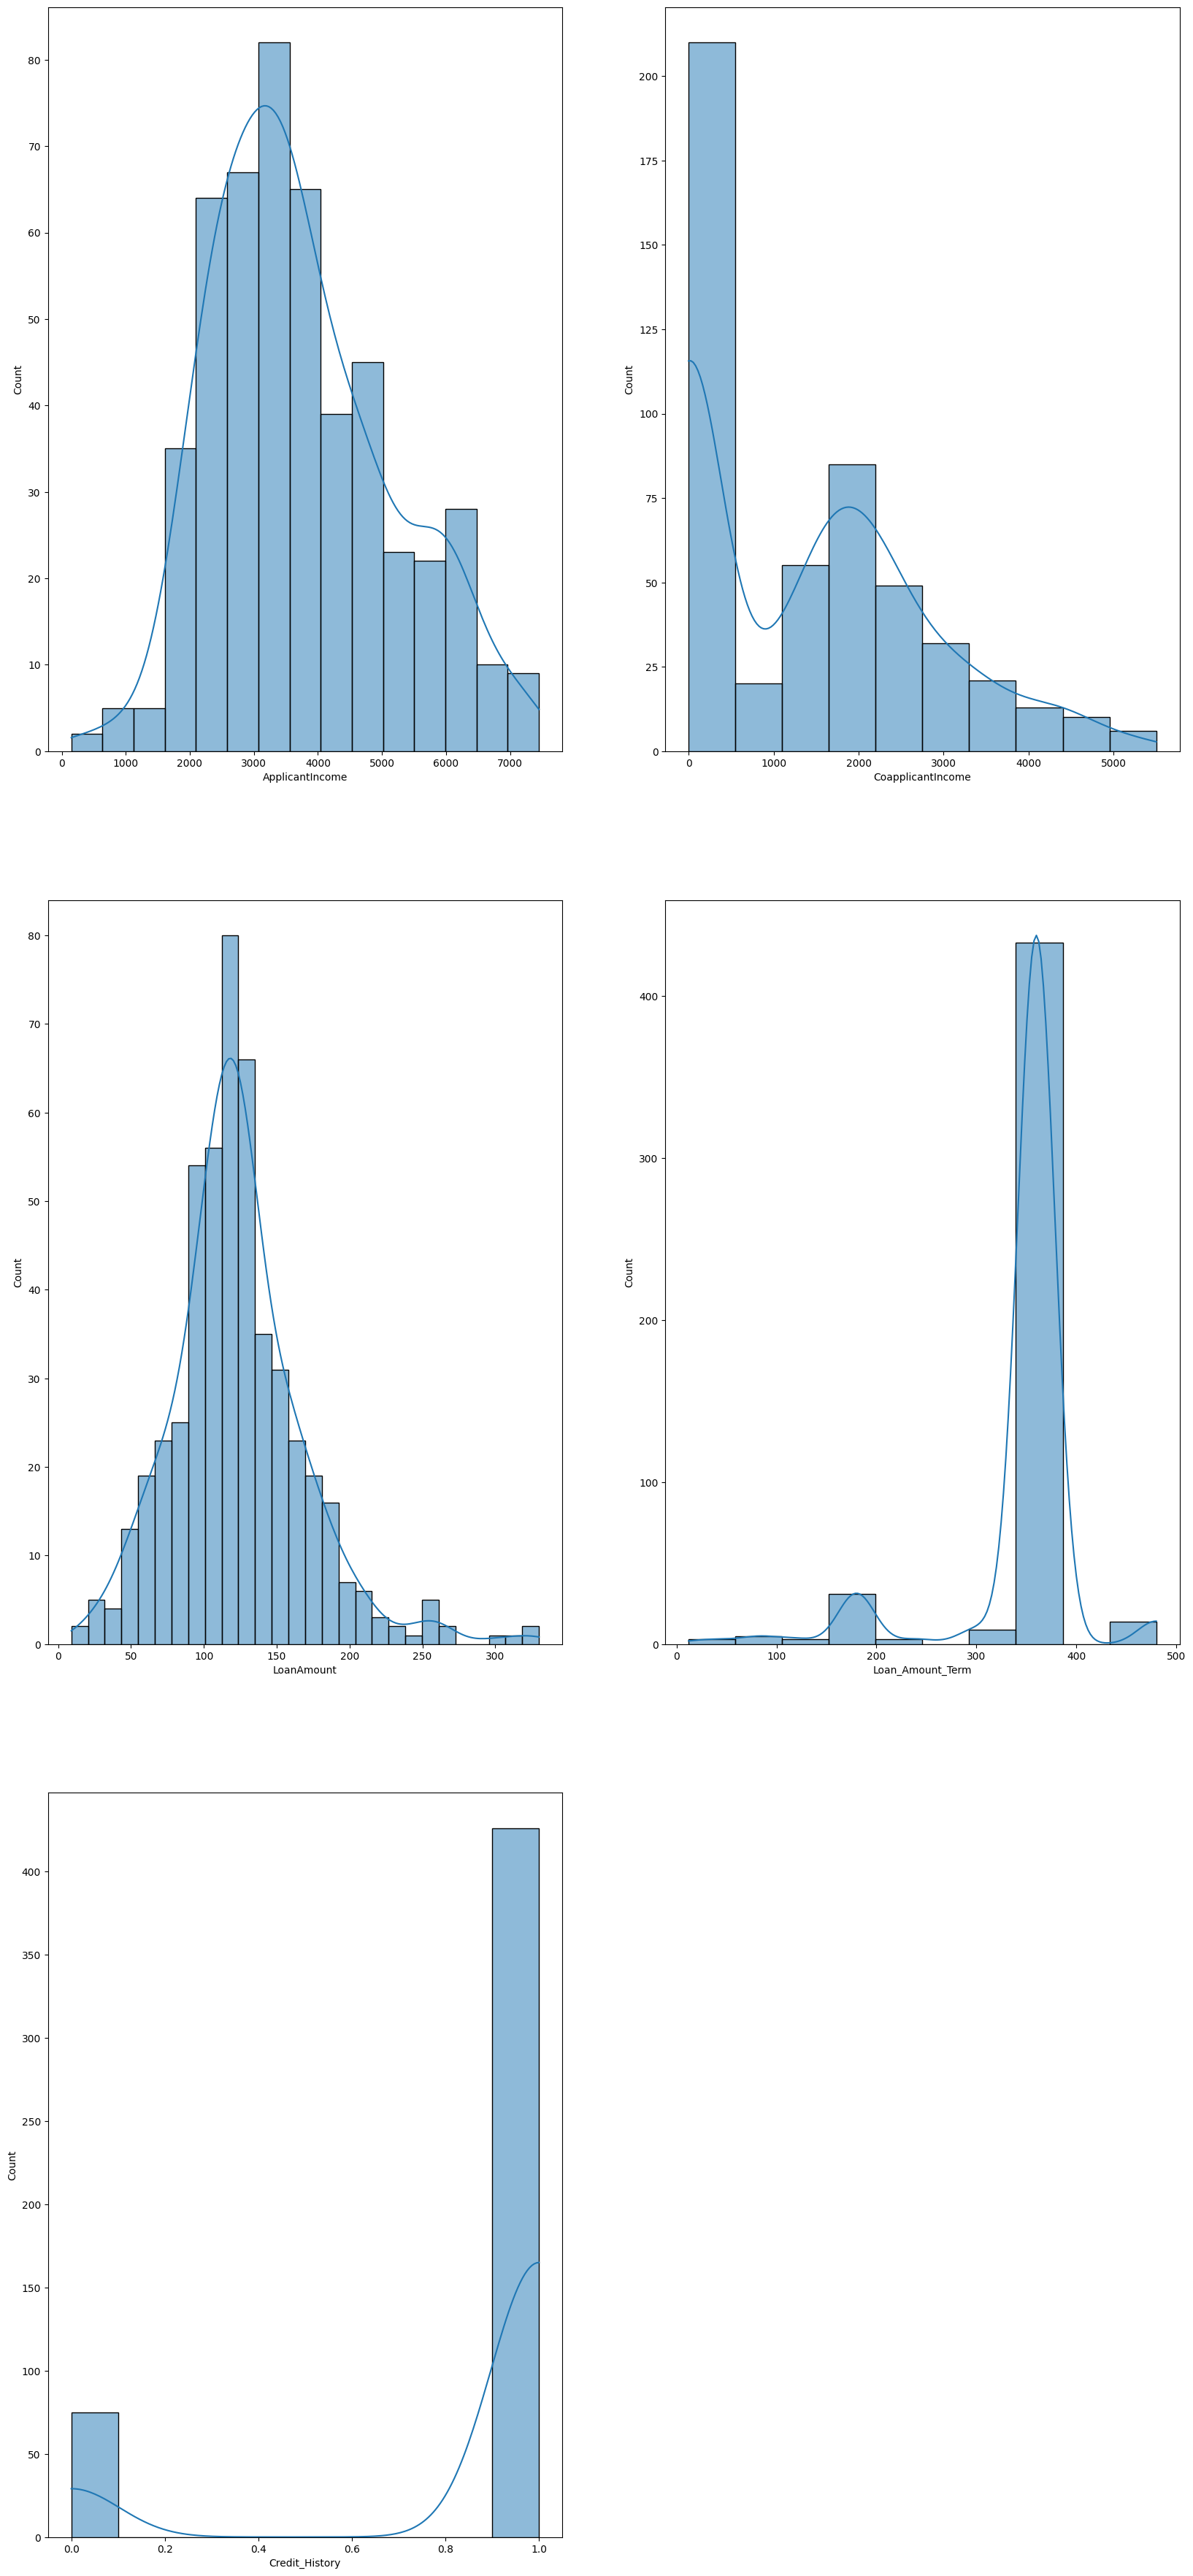

In [30]:
plt.figure(figsize=(20, 45))
for i, col in list(enumerate(num)):
    ax = plt.subplot(3, 2, i+1)
    sns.histplot(x = df[col], ax = ax , kde=True)
    

In [31]:
# 4. data transform
def dataTransform(df):
    enc = LabelEncoder()
    for i in df.columns:
        if (df[i].dtypes == "object"):
            df[i] = enc.fit_transform(df[i])

In [32]:
dataTransform(df)

In [33]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


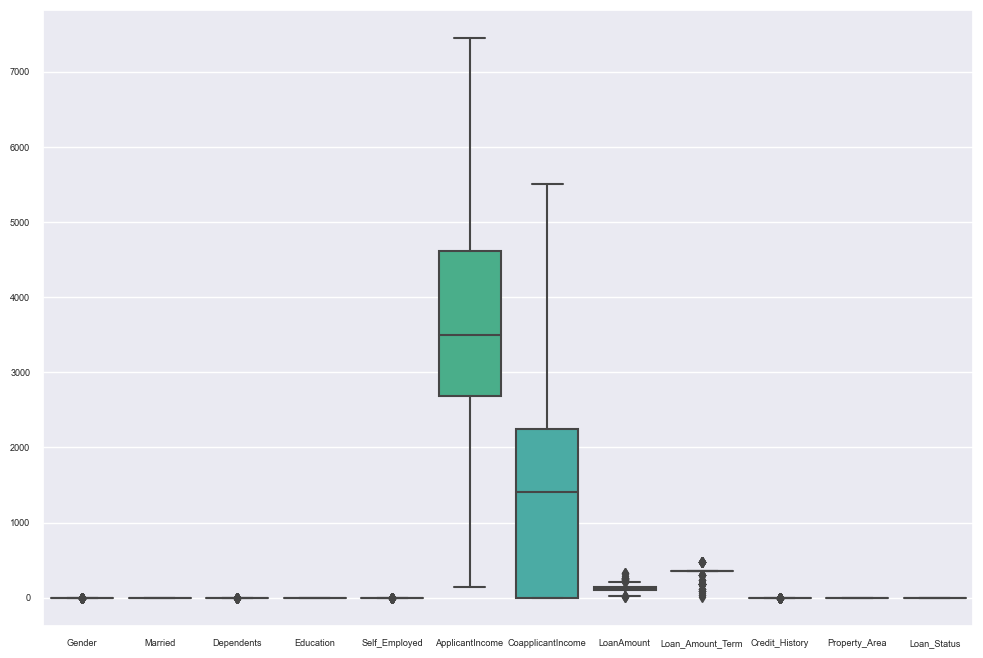

In [34]:
plt.figure(figsize=(12, 8))
sns.set(font_scale=0.6)
sns.boxplot(data = df)
plt.show()

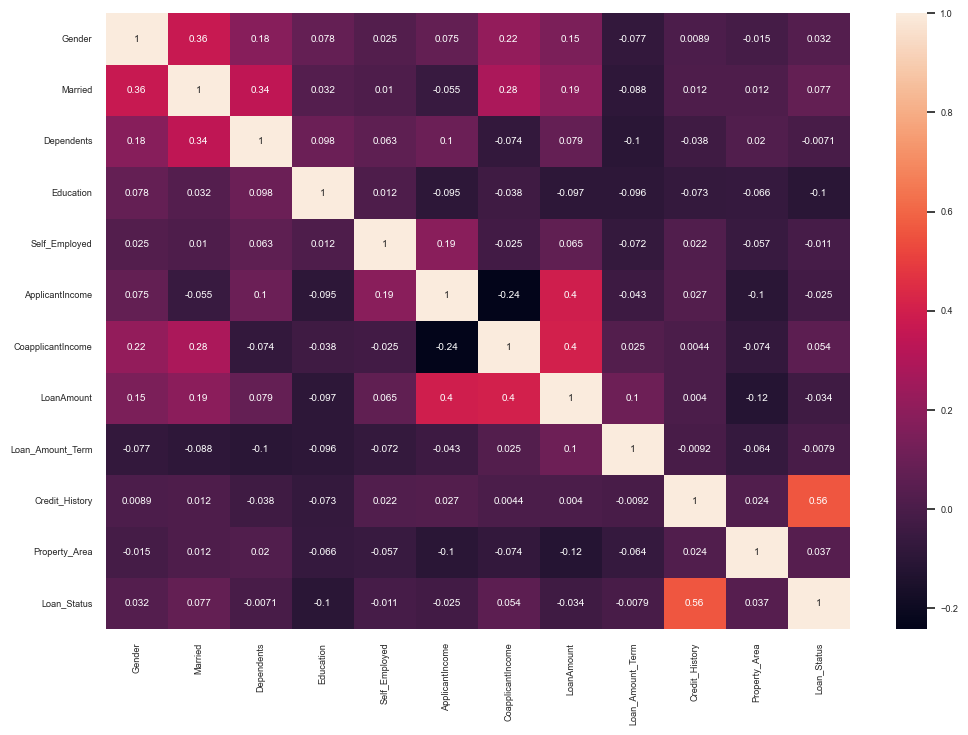

In [35]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

## saving clean dataset

In [36]:
df.to_csv("./Data/loan/Clean_Dataset.csv")

## Models

In [37]:
# Machine Learning
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [38]:
X = df.drop("Loan_Status", axis=1)
y = df.Loan_Status

In [39]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [40]:
X_train.shape, y_train.shape

((335, 11), (335,))

In [41]:
X_test.shape, y_test.shape

((166, 11), (166,))

### Logistic

In [42]:
model = LogisticRegression(solver='lbfgs', max_iter=1000).fit(X_train, y_train)
pred = model.predict(X_test)
acc  = accuracy_score(pred, y_test)
acc

0.8132530120481928

### DecisionTreeClassifier

In [43]:
model1 = DecisionTreeClassifier().fit(X_train, y_train)
pred1 = model1.predict(X_test)
acc1  = accuracy_score(pred1, y_test)
acc1

0.7289156626506024

### KNeighborsClassifier

In [44]:
model2 = KNeighborsClassifier().fit(X_train, y_train)
pred2 = model2.predict(X_test)
acc2  = accuracy_score(pred2, y_test)
acc2

0.6506024096385542

### GaussianNB

In [45]:
model3 = GaussianNB().fit(X_train, y_train)
pred3 = model3.predict(X_test)
acc3  = accuracy_score(pred3, y_test)
acc3

0.8012048192771084

### SVC

In [46]:
model4 = SVC().fit(X_train, y_train)
pred4 = model4.predict(X_test)
acc4  = accuracy_score(pred4, y_test)
acc4

0.6385542168674698

 ### RandomForestClassifier

In [47]:
model5 = RandomForestClassifier().fit(X_train, y_train)
pred5 = model5.predict(X_test)
acc5  = accuracy_score(pred5, y_test)
acc5

0.8132530120481928

### GradientBoostingClassifier

In [48]:
model6 = GradientBoostingClassifier().fit(X_train, y_train)
pred6 = model6.predict(X_test)
acc6  = accuracy_score(pred6, y_test)
acc6

0.7891566265060241

### saving result into csv file

In [49]:
result = {"algorithm":["LogisticRegression", "DecisionTreeClassifier", "KNeighborsClassifier", "GaussianNB", "SVC", "RandomForestClassifier", "GradientBoostingClassifier"], "accuracy": [acc*100, acc1*100, acc2*100, acc3*100, acc4*100, acc5*100, acc6*100]}
resultdf = pd.DataFrame(result)

In [50]:
resultdf.to_csv("./Data/Result.csv")
resultdf

,algorithm,accuracy
0,LogisticRegression,81.325301
1,DecisionTreeClassifier,72.891566
2,KNeighborsClassifier,65.060241
3,GaussianNB,80.120482
4,SVC,63.855422
5,RandomForestClassifier,81.325301
6,GradientBoostingClassifier,78.915663


# Creating pickle file for application

In [52]:
import pickle
filename = open("./App/LogisticRegression.pkl",'wb')
pickle.dump(model5,filename)